In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy import linalg as LA

# Exercise H4.2: 
Comparison of gradient descent methods (homework, 6 points)

In this exercise we compare the performance of three learning procedures applied to a simple connectionist neuron with a linear output function. All procedures will compute the gradient using the entire training set (batch gradient descent). The procedures are:

(i) Gradient (or steepest) descent with constant learning rate,

(ii) steepest descent combined with a line search method to determine the learning rate, and

(iii) the conjugate gradient method.

In [3]:
#Data from task
#2x3
X = np.array([[1, -1], [1, 0.3], [1, 2]]).T
#1x3
Y_true = np.array([[-0.1, 0.5, 0.5]])

#2x1
w1 = np.array([[-0.45, 0.2]]).T

(a) (2 points) Gradient Descent: Implement a steepest descent procedure where the weights at iteration t + 1 are calculated using the weights and the gradient at iteration t

In [4]:
w = w1
nu = 0.01
for i in np.arange(2000):
    #2x2
    H = 1/3 * X @ X.T
    #2x1
    g = (H @ w[:,i]).reshape(2,1) - 1/3 * X @ Y_true.T
    #2x1
    new_w = (w[:,i]).reshape(2,1) - nu * g
    #2xi
    w = np.append(w, new_w, axis = 1)

Text(0.5, 1.0, 'w1 vs. w0')

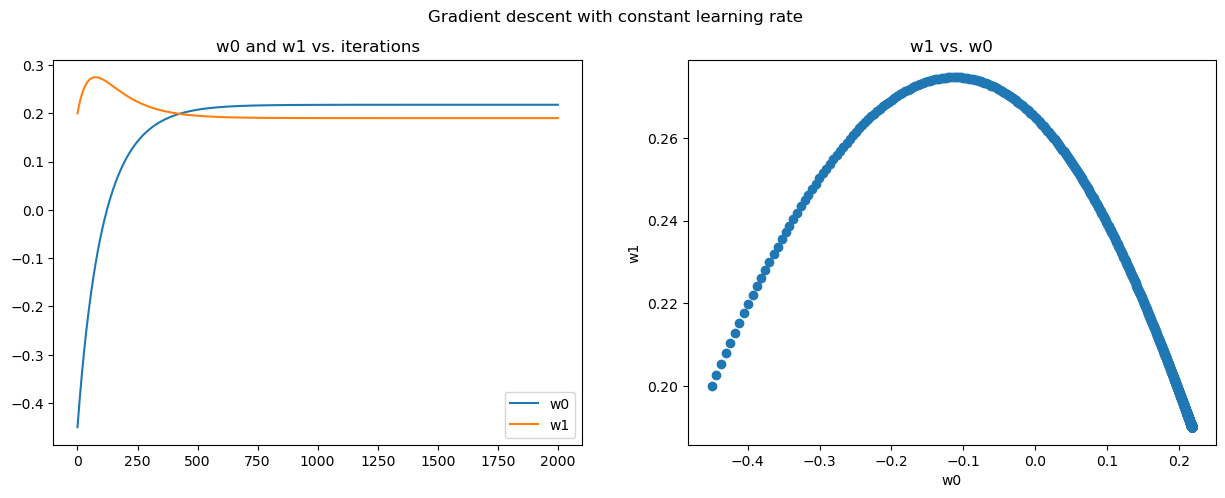

In [5]:
#Plot results
fig = plt.figure(figsize=(15,5))
fig.suptitle('Gradient descent with constant learning rate')
ax1 = fig.add_subplot(1,2,1)

plt.plot(w[0,:], label = 'w0')
plt.plot(w[1,:], label = 'w1')
plt.legend()
plt.title('w0 and w1 vs. iterations')

ax2 = fig.add_subplot(1,2,2)
plt.scatter(w[0,:], w[1,:])
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('w1 vs. w0')

In [6]:
#Line Search
def line_search(w_i, g, X, Y, a = 0.005, b = 0.01, c = 0.02):
    '''
    Returns:
    a: 2nd degree coeff. of parabola
    b: 1st degree coeff. of parabola
    c: offset of parabola
    '''
    abc = np.array([a,b,c]).reshape(3,1)
    
    #Calculate w values depending on a,b,c
    w_a = w_i.reshape(2,1) - g * a
    w_b = w_i.reshape(2,1) - g + b
    w_c = w_i.reshape(2,1) - g + c
    w_abc = np.array([w_a, w_b, w_c]).reshape(3,2)

    #Calculate error values
    error_a = 0.5 * np.sum(np.square(w_a.T @ X - Y))/3
    error_b = 0.5 * np.sum(np.square(w_b.T @ X - Y))/3
    error_c = 0.5 * np.sum(np.square(w_c.T @ X - Y))/3
    error_abc = np.array([error_a, error_b, error_c])

    #Fit parabola
    a,b,c = np.polyfit(np.array([a,b,c]), np.array([error_a, error_b, error_c]), 2)
    minimum = -b/(2*a)

    #find max error
    max_error = np.max(error_abc)
    index_max_error = np.where(error_abc == max_error)[0]

    #Delete w with highest error
    #w_abc = np.delete(w_abc, index_max_error, axis = 0)
    abc = np.delete(abc, index_max_error, axis = 0)

    #Append minimum of line search
    #w_abc = np.append(w_abc, w_new, axis = 1)
    abc = np.append(abc, minimum)

    #Calculate error with minimum value
    w_new = w_i.reshape(2,1) - g * minimum
    min_error = 0.5 * np.sum(np.square(w_new.T @ X - Y))/3

    return abc, min_error, max_error

In [9]:
w = w1
for i in np.arange(2000):
    #2x2
    H = 1/3 * X @ X.T
    #2x1
    g = (H @ w[:,i]).reshape(2,1) - 1/3 * X @ Y_true.T
    
    #Call line search
    a = 0.005
    b = 0.01
    c = 0.02
    for j in np.arange(10):
        abc, min_error, max_error = line_search(w[:,i], g, X, Y_true, a, b, c) 
        a = abc[0]
        b = abc[1]
        c = abc[2]
    nu = c
    
    #2x1
    new_w = (w[:,i]).reshape(2,1) - nu * g
    #2xi
    w = np.append(w, new_w, axis = 1)

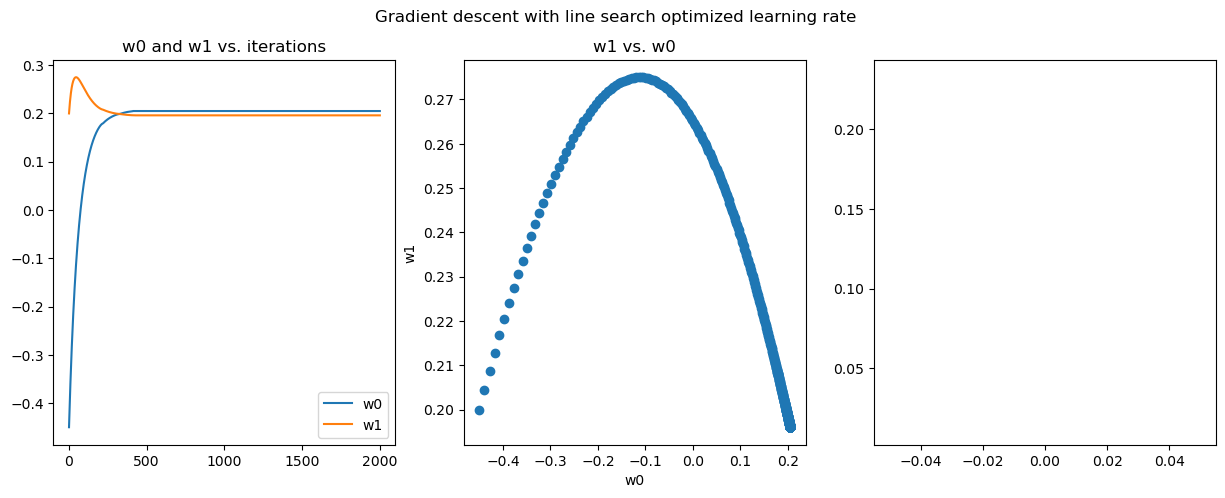

In [11]:
#Plot results
fig = plt.figure(figsize=(15,5))
fig.suptitle('Gradient descent with line search optimized learning rate')
ax1 = fig.add_subplot(1,3,1)

plt.plot(w[0,:], label = 'w0')
plt.plot(w[1,:], label = 'w1')
plt.legend()
plt.title('w0 and w1 vs. iterations')

ax2 = fig.add_subplot(1,3,2)
plt.scatter(w[0,:], w[1,:])
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('w1 vs. w0')

ax3 = fig.add_subplot(1,3,3)
for i in np.arange(np.shape(w[1])[0]):
    plt.plot(0.5 * np.sum(np.square(w[:,i].T @ X - Y_true))/3)

In [ ]:
for i in np.arange(np.shape(w[1])[0]):
    #plt.plot(0.5 * np.sum(np.square(w[:,i].T @ X - Y))/3)

IndentationError: expected an indented block (3469469637.py, line 2)

In [ ]:
0.5 * np.sum(np.square(w[:,100].T @ X - Y))/3

NameError: name 'np' is not defined